## E-Sun Credit Card Fraud Detection task
- In this competition, participants are given a training dataset and a test dataset of credit card transactions, with columns of transaction IDs, date, time, amount, store information, city and fraud transaction indicators. The task is to come up with a model to detect fraud transaction in the test dataset that out performs other models.

- Due Date: Nov.22 2019.

- <a href="https://tbrain.trendmicro.com.tw/Competitions/Details/8">Website</a>

- include all Exploratory in this notebook

### Column description

In [4]:
from IPython.display import IFrame
IFrame("dataset_description.pdf", width=600, height=300)

In [5]:
# import modules
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import train data
train_raw = pd.read_csv('train.csv')

In [7]:
N, N_f = train_raw.shape #1521787, 23

In [9]:
train_raw.sample(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
1114878,6716,84847,212620,1591.47,5,62,N,4,N,N,...,2,78,104143.0,247,60275,N,5803,102,0,1309668
45128,5975,12996,170506,857.05,5,62,N,4,N,N,...,0,8,151315.0,263,96702,N,5817,102,0,1766041
824216,6769,78333,121298,570.66,5,62,N,5,N,N,...,0,75,134557.0,251,77988,N,5817,102,0,149700
123692,6716,130284,199360,755.09,5,62,Y,8,N,N,...,0,14,104155.0,57,34227,N,5820,102,0,1626804
193648,6189,94387,129747,781.29,2,62,N,2,N,N,...,0,28,140701.0,264,91303,N,5817,102,0,1421435


In [10]:
# dummy code all columns with values Y/N to 1/0
def to_dummy(i):
    d = {'Y':1, 'y':1, 'N':0,'n':0}
    try:
        return d[i]
    except:
        return i


isObjCol = train_raw.dtypes=='object'
isObjCol = isObjCol[isObjCol==True].index
if len(isObjCol) >0:
    train_raw[isObjCol] = train_raw.select_dtypes(['object']).applymap(lambda x:to_dummy(x))
    #train_raw.select_dtypes(['object']).isnull().sum()


In [11]:
train_raw.describe()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.509206e+06,1.509206e+06,...,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,2.544870e-01,4.149114e+00,3.361370e-03,4.263103e-02,...,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,1.330738e-02,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,4.355726e-01,2.394259e+00,5.787982e-02,2.020239e-01,...,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.145875e-01,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,0.000000e+00,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,...,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,1.000000e+00,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


### Descriptive Statistics
- The overall average transaction number about ``12`` within 90 days, or, on average, 
- The Overall average transaction amount for is around ``NTD730``


In [12]:
txn_num_ByAc = train_raw.groupby(['bacno','cano']).agg({'txkey':'count', 'conam':'mean'})
pd.set_option('precision', 2)
txn_num_ByAc.describe()

,txkey,conam
count,129413.00,129413.00
mean,11.76,730.77
std,15.91,367.18
min,1.00,0.00
25%,3.00,513.80
50%,7.00,662.07
75%,15.00,844.82
max,1117.00,6728.97


### Overall Fraud Rate
fraud/non-fraud: 1501432/20355 about 74:1

- acc = <b>0.9864</b> if guess all non_fraud
- Stated differently, the most naive algorithm, saying every single transaction is fraudulent, will yield an accuracy rate of about 1.3 %.

In [18]:
fraud = train_raw.fraud_ind == 1
non_fraud = train_raw.fraud_ind == 0
train_raw.groupby(['fraud_ind']).agg({'txkey':'count'})

,txkey
fraud_ind,
0,1501432
1,20355


(array([543.,   8., 351.,  52.,  33.,  73.,  93.,  65.,  56., 101.,  72.,
         63., 111., 125.,  92., 113., 126.,  95., 112., 128.,  42.,  43.,
        361.,  81., 480.,  22.,  25.,  41.,  21.,  14.,  29.,  20.,  17.,
         23.,  21.,  21.,  14.,  24.,  14.,  37.,  23.,  13.,  24.,  17.,
          9.,  14.,  21.,  19.,  21.,  25.,  31.,  14.,   9.,   5.,   3.,
         10.,   6.,   7.,   4.,   4.,   5.,   1.,   4.,   2.,   2.,   2.,
          2.,   0.,   2.,   0.,   2.,   0.,   0.,   2.,   1.]),
 array([   0.    ,   42.0404,   84.0808,  126.1212,  168.1616,  210.202 ,
         252.2424,  294.2828,  336.3232,  378.3636,  420.404 ,  462.4444,
         504.4848,  546.5252,  588.5656,  630.606 ,  672.6464,  714.6868,
         756.7272,  798.7676,  840.808 ,  882.8484,  924.8888,  966.9292,
        1008.9696, 1051.01  , 1093.0504, 1135.0908, 1177.1312, 1219.1716,
        1261.212 , 1303.2524, 1345.2928, 1387.3332, 1429.3736, 1471.414 ,
        1513.4544, 1555.4948, 1597.5352, 1639.57

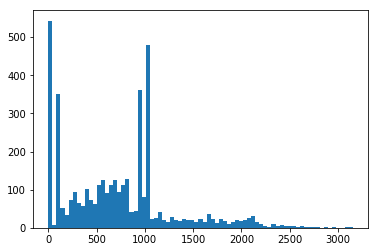

In [14]:
sample = train_raw.sample(round(N/5))
plt.hist(sample['conam'][sample['fraud_ind']==1], bins=75)
#plt.hist(sample['conam'][sample['fraud_ind']==0], bins=50)
# either 100 or 1000 why ?????

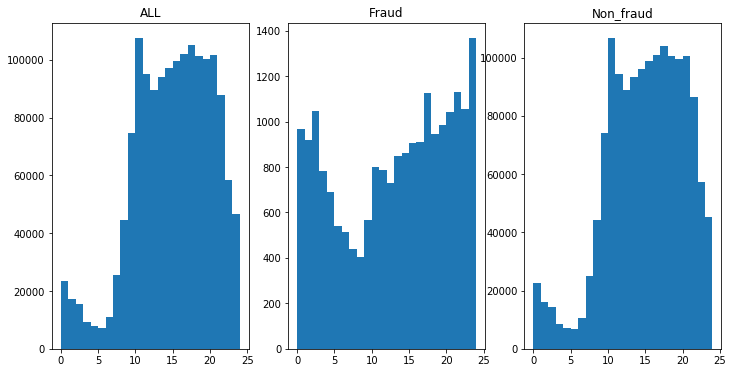

In [15]:
# txn time by all, fraud, non fraud
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12,6))

axes[0].hist((train_raw.loctm/10000).round().map(int), bins=24)
axes[0].title.set_text('ALL')
axes[1].hist((train_raw.loctm[fraud]/10000).round().map(int), bins=24)
axes[1].title.set_text('Fraud')
axes[2].hist((train_raw.loctm[non_fraud]/10000).round().map(int), bins=24)
axes[2].title.set_text('Non_fraud')
plt.show()

### feature correlation


Text(0.5,1,'Heatmap of Correlation')

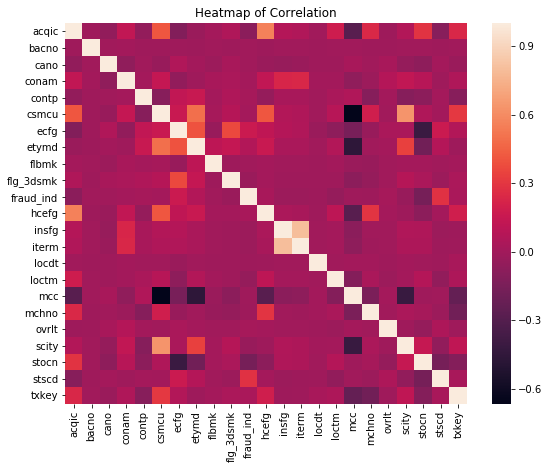

In [16]:
corr = train_raw.corr()
plt.figure(figsize=(9,7))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

#### fraud_ind have some corr with stscd?

狀態碼??

In [17]:
train_raw.groupby(['stscd','fraud_ind']).agg({'txkey':'count'})

txkey
stscd fraud_ind         
0     0          1488066
      1            14679
1     0              383
      1               25
2     0            12855
      1             5651
3     0              108
4     0               20

### Ｍore on fraudulent transactions
what are some characteristics of fraudulent transactions?


In [22]:
Fraudulent_Txr_Train = train_raw.loc[train_raw['fraud_ind'] == 1]
Fraudulent_Txr_Train.describe()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,2.02e+04,2.02e+04,...,2.04e+04,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,20355.00,2.04e+04
mean,4928.19,82206.28,111327.17,712.27,4.96,56.23,0.86,5.54,4.32e-03,4.96e-03,...,3.64e-03,42.70,127206.38,295.92,52664.16,0.03,4266.87,69.45,0.56,1.14e+06
std,1541.31,47308.98,60761.67,565.65,0.21,15.87,0.35,2.95,6.56e-02,7.03e-02,...,8.69e-02,23.55,73353.36,68.60,17986.23,0.17,2351.86,31.63,0.90,5.66e+05
min,0.00,2.00,23.00,0.00,2.00,0.00,0.00,0.00,0.00e+00,0.00e+00,...,0.00e+00,1.00,5.00,5.00,0.00,0.00,0.00,0.00,0.00,1.59e+04
25%,3348.00,40111.00,61213.00,216.12,5.00,61.00,1.00,2.00,0.00e+00,0.00e+00,...,0.00e+00,25.00,60539.50,263.00,51341.00,0.00,1803.00,38.00,0.00,6.96e+05
50%,5720.00,83107.00,112592.00,696.35,5.00,61.00,1.00,8.00,0.00e+00,0.00e+00,...,0.00e+00,40.00,140146.00,289.00,54828.00,0.00,5279.00,75.00,0.00,7.52e+05
75%,6331.00,122941.00,165190.00,1016.34,5.00,62.00,1.00,8.00,0.00e+00,0.00e+00,...,0.00e+00,61.00,191959.00,360.00,59584.00,0.00,6580.00,104.00,2.00,1.86e+06
max,6883.00,163864.00,212152.00,3353.25,6.00,75.00,1.00,9.00,1.00e+00,1.00e+00,...,4.00e+00,90.00,235959.00,458.00,103306.00,1.00,6665.00,106.00,2.00,1.96e+06


Do fraudulent transactions happen in some cities in particular?

In [29]:

Fraud_by_ID_city = train_raw[['cano','fraud_ind', 'scity']].groupby(['scity', 'fraud_ind']).count().reset_index()
Fraud_by_ID_city = Fraud_by_ID.sort_values(by=['fraud_ind', 'cano'], ascending = False)
Fraud_by_ID_city_top_10 = Fraud_by_ID_city[:10]
print(Fraud_by_ID_city_top_10)

      scity  fraud_ind  cano
6322   6580          1  5657
3328   3460          1  2682
6336   6593          1  1545
1274   1337          1  1103
1         0          1   801
5595   5817          1   697
5111   5320          1   518
595     621          1   480
5698   5932          1   334
1734   1803          1   260
